## Importing the Necessary Libraries

In [ ]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import openpyxl
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, roc_auc_score, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet, BayesianRidge, ARDRegression, HuberRegressor,RANSACRegressor, TheilSenRegressor, SGDClassifier, SGDRegressor, PassiveAggressiveClassifier, PassiveAggressiveRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestCentroid
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.svm import SVR, LinearSVC, LinearSVR, NuSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor, BaggingRegressor, BaggingClassifier, ExtraTreesClassifier, ExtraTreesRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Loading Datasets

In [3]:
df=pd.read_csv(r'D:\MachineLearning\Student_Performance_Estimation_System\Data_Sets\students_data.csv')

## Initial Inspections

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
df.head()

,sex,age,address,FamilySize,ParentStatus,MotherEducation,FatherEducation,MotherJob,FatherJob,reason,guardian,traveltime_in_min,studytime_in_hrs,no_of_failures,SchoolSupport,FamilySupport,ExtraPaidClasses,activities,nursery,higher,internet,romantic,FamilyRelation,freetime,Hangout,DailyAlcoholConsumption,WeekendAlcoholConsumption,health,absences,finalmarks,final_marks_in_percentage,finalgrades
0,F,18.0,Urban,Greater_Than_3,Apart,higher_education,higher_education,at_home,teacher,course,mother,15_30,2-5,0,yes,no,no,no,yes,yes,no,no,very_good,medium,high,very_low,very_low,good,6.0,6,30.0,1.2
1,F,17.0,Urban,Greater_Than_3,Together,primary_education,primary_education,at_home,other,course,father,<15,2-5,0,no,yes,no,no,no,yes,yes,no,excellent,medium,medium,very_low,very_low,good,NaN,6,30.0,1.2
2,F,15.0,Urban,Less_Equal_3,Together,primary_education,primary_education,at_home,other,other,mother,<15,2-5,3,yes,no,yes,no,yes,yes,yes,no,very_good,medium,low,low,medium,good,10.0,10,50.0,2.0
3,F,15.0,NaN,Greater_Than_3,Together,higher_education,lower_secondary,health,services,home,mother,<15,5-10,0,no,yes,yes,yes,yes,yes,yes,yes,good,low,low,very_low,very_low,excellent,2.0,15,75.0,3.0
4,F,16.0,Urban,Greater_Than_3,Together,secondary_education,secondary_education,other,other,home,father,<15,2-5,0,no,yes,yes,no,yes,yes,no,no,very_good,medium,low,very_low,low,excellent,NaN,10,50.0,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex                        395 non-null    object 
 1   age                        392 non-null    float64
 2   address                    393 non-null    object 
 3   FamilySize                 395 non-null    object 
 4   ParentStatus               395 non-null    object 
 5   MotherEducation            395 non-null    object 
 6   FatherEducation            395 non-null    object 
 7   MotherJob                  395 non-null    object 
 8   FatherJob                  395 non-null    object 
 9   reason                     395 non-null    object 
 10  guardian                   395 non-null    object 
 11  traveltime_in_min          395 non-null    object 
 12  studytime_in_hrs           395 non-null    object 
 13  no_of_failures             395 non-null    int64  

## For Multiple values used [[]]

In [6]:
df[['absences', 'finalgrades']].head()

,absences,finalgrades
0,6.0,1.2
1,NaN,1.2
2,10.0,2.0
3,2.0,3.0
4,NaN,2.0


In [ ]:
df[['absences', 'finalgrades']].loc[0:2] #loc is inclusive

,absences,finalgrades
0,6.0,1.2
1,NaN,1.2
2,10.0,2.0


In [8]:
df[['absences', 'finalgrades']].iloc[0:2] #iloc is exclusive

,absences,finalgrades
0,6.0,1.2
1,NaN,1.2


In [9]:
df.describe()

,age,no_of_failures,absences,finalmarks,final_marks_in_percentage,finalgrades
count,392.000000,395.000000,392.000000,395.000000,395.000000,395.000000
mean,16.704082,0.334177,5.721939,10.415190,52.075949,2.083038
std,1.277059,0.743651,8.032334,4.581443,22.907213,0.916289
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,8.000000,40.000000,1.600000
50%,17.000000,0.000000,4.000000,11.000000,55.000000,2.200000
75%,18.000000,0.000000,8.000000,14.000000,70.000000,2.800000
max,22.000000,3.000000,75.000000,20.000000,100.000000,4.000000


In [11]:
df.describe(include='all')

,sex,age,address,FamilySize,ParentStatus,MotherEducation,FatherEducation,MotherJob,FatherJob,reason,guardian,traveltime_in_min,studytime_in_hrs,no_of_failures,SchoolSupport,FamilySupport,ExtraPaidClasses,activities,nursery,higher,internet,romantic,FamilyRelation,freetime,Hangout,DailyAlcoholConsumption,WeekendAlcoholConsumption,health,absences,finalmarks,final_marks_in_percentage,finalgrades
count,395,392.000000,393,395,395,395,395,395,395,395,395,395,395,395.000000,395,395,395,395,395,395,395,395,395,395,395,395,395,395,392.000000,395.000000,395.000000,395.000000
unique,2,NaN,2,2,2,5,5,5,5,4,3,4,4,NaN,2,2,2,2,2,2,2,2,5,5,5,5,5,5,NaN,NaN,NaN,NaN
top,F,NaN,Urban,Greater_Than_3,Together,higher_education,lower_secondary,other,other,course,mother,<15,2-5,NaN,no,yes,no,yes,yes,yes,yes,no,very_good,medium,medium,very_low,very_low,excellent,NaN,NaN,NaN,NaN
freq,208,NaN,305,281,354,131,115,141,217,145,273,257,198,NaN,344,242,214,201,314,375,329,263,195,157,130,276,151,146,NaN,NaN,NaN,NaN
mean,NaN,16.704082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.334177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.721939,10.415190,52.075949,2.083038
std,NaN,1.277059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.032334,4.581443,22.907213,0.916289
min,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,8.000000,40.000000,1.600000
50%,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,11.000000,55.000000,2.200000
75%,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,14.000000,70.000000,2.800000


In [13]:
print(df.columns.to_list())

['sex', 'age', 'address', 'FamilySize', 'ParentStatus', 'MotherEducation', 'FatherEducation', 'MotherJob', 'FatherJob', 'reason', 'guardian', 'traveltime_in_min', 'studytime_in_hrs', 'no_of_failures', 'SchoolSupport', 'FamilySupport', 'ExtraPaidClasses', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'FamilyRelation', 'freetime', 'Hangout', 'DailyAlcoholConsumption', 'WeekendAlcoholConsumption', 'health', 'absences', 'finalmarks', 'final_marks_in_percentage', 'finalgrades']


In [14]:
df.tail()

,sex,age,address,FamilySize,ParentStatus,MotherEducation,FatherEducation,MotherJob,FatherJob,reason,guardian,traveltime_in_min,studytime_in_hrs,no_of_failures,SchoolSupport,FamilySupport,ExtraPaidClasses,activities,nursery,higher,internet,romantic,FamilyRelation,freetime,Hangout,DailyAlcoholConsumption,WeekendAlcoholConsumption,health,absences,finalmarks,final_marks_in_percentage,finalgrades
390,M,20.0,Urban,Less_Equal_3,Apart,lower_secondary,lower_secondary,services,services,course,other,<15,2-5,2,no,yes,yes,no,yes,yes,no,no,excellent,very_high,high,high,very_high,very_good,11.0,9,45.0,1.8
391,M,17.0,Urban,Less_Equal_3,Together,secondary_education,primary_education,services,services,course,mother,15_30,<2,0,no,no,no,no,no,yes,yes,no,bad,high,very_high,medium,high,bad,3.0,16,80.0,3.2
392,M,21.0,Rural,Greater_Than_3,Together,primary_education,primary_education,other,other,course,other,<15,<2,3,no,no,no,no,no,yes,no,no,excellent,very_high,medium,medium,medium,good,3.0,7,35.0,1.4
393,M,18.0,Rural,Less_Equal_3,Together,secondary_education,lower_secondary,services,other,course,mother,30_60,<2,0,no,no,no,no,no,yes,yes,no,very_good,high,very_low,medium,high,excellent,0.0,10,50.0,2.0
394,M,19.0,Urban,Less_Equal_3,Together,primary_education,primary_education,other,at_home,course,father,<15,<2,0,no,no,no,no,yes,yes,yes,no,good,low,medium,medium,medium,excellent,5.0,9,45.0,1.8


In [15]:
df.shape

(395, 32)

In [16]:
df.sample(10)

,sex,age,address,FamilySize,ParentStatus,MotherEducation,FatherEducation,MotherJob,FatherJob,reason,guardian,traveltime_in_min,studytime_in_hrs,no_of_failures,SchoolSupport,FamilySupport,ExtraPaidClasses,activities,nursery,higher,internet,romantic,FamilyRelation,freetime,Hangout,DailyAlcoholConsumption,WeekendAlcoholConsumption,health,absences,finalmarks,final_marks_in_percentage,finalgrades
223,M,18.0,Urban,Greater_Than_3,Together,lower_secondary,lower_secondary,other,other,home,mother,15_30,2-5,0,no,yes,yes,no,yes,yes,yes,no,good,medium,medium,very_high,very_high,very_good,0.0,13,65.0,2.6
119,M,15.0,Urban,Greater_Than_3,Together,secondary_education,higher_education,other,other,reputation,father,<15,<2,0,no,no,no,no,yes,yes,yes,no,good,high,medium,very_low,low,very_good,6.0,13,65.0,2.6
110,M,15.0,Urban,Less_Equal_3,Apart,higher_education,higher_education,teacher,teacher,course,mother,<15,<2,0,no,no,no,yes,yes,yes,yes,no,excellent,very_high,medium,very_low,very_low,very_good,6.0,19,95.0,3.8
138,M,16.0,Urban,Less_Equal_3,Together,primary_education,primary_education,services,other,course,mother,<15,2-5,1,no,no,no,no,yes,yes,no,yes,very_good,high,high,very_low,medium,excellent,0.0,12,60.0,2.4
386,F,18.0,Rural,Greater_Than_3,Together,higher_education,higher_education,teacher,at_home,reputation,mother,30_60,<2,0,no,yes,yes,yes,yes,yes,yes,yes,very_good,high,medium,low,low,excellent,7.0,6,30.0,1.2
111,F,16.0,Rural,Greater_Than_3,Together,secondary_education,secondary_education,services,other,reputation,father,<15,5-10,1,yes,yes,no,yes,yes,yes,yes,no,very_good,very_low,low,very_low,very_low,bad,0.0,10,50.0,2.0
260,F,18.0,Urban,Greater_Than_3,Together,higher_education,secondary_education,services,other,home,father,<15,2-5,0,no,yes,yes,no,yes,yes,yes,yes,good,very_low,low,very_low,medium,bad,21.0,18,90.0,3.6
336,F,19.0,Rural,Greater_Than_3,Apart,secondary_education,primary_education,services,at_home,home,other,<15,5-10,1,no,no,yes,no,yes,yes,no,no,excellent,high,medium,very_low,low,excellent,12.0,13,65.0,2.6
334,F,18.0,Rural,Greater_Than_3,Together,lower_secondary,lower_secondary,at_home,other,course,mother,15_30,>10,0,no,no,no,yes,yes,yes,no,no,very_good,high,high,very_low,very_low,very_good,0.0,0,0.0,0.0
392,M,21.0,Rural,Greater_Than_3,Together,primary_education,primary_education,other,other,course,other,<15,<2,3,no,no,no,no,no,yes,no,no,excellent,very_high,medium,medium,medium,good,3.0,7,35.0,1.4


In [ ]:
df.size #multiple rows and columns

12640

In [18]:
df.ndim

2

In [ ]:
df.dtypes 

sex                           object
age                          float64
address                       object
FamilySize                    object
ParentStatus                  object
MotherEducation               object
FatherEducation               object
MotherJob                     object
FatherJob                     object
reason                        object
guardian                      object
traveltime_in_min             object
studytime_in_hrs              object
no_of_failures                 int64
SchoolSupport                 object
FamilySupport                 object
ExtraPaidClasses              object
activities                    object
nursery                       object
higher                        object
internet                      object
romantic                      object
FamilyRelation                object
freetime                      object
Hangout                       object
DailyAlcoholConsumption       object
WeekendAlcoholConsumption     object
h

In [20]:
df.index

RangeIndex(start=0, stop=395, step=1)

In [21]:
df['romantic'].value_counts()

romantic
no     263
yes    132
Name: count, dtype: int64

## Data Preprocessing

In [27]:
df.isnull().sum() ##missing values

sex                          0
age                          3
address                      2
FamilySize                   0
ParentStatus                 0
MotherEducation              0
FatherEducation              0
MotherJob                    0
FatherJob                    0
reason                       0
guardian                     0
traveltime_in_min            0
studytime_in_hrs             0
no_of_failures               0
SchoolSupport                0
FamilySupport                0
ExtraPaidClasses             0
activities                   0
nursery                      0
higher                       0
internet                     0
romantic                     0
FamilyRelation               0
freetime                     0
Hangout                      0
DailyAlcoholConsumption      0
WeekendAlcoholConsumption    0
health                       0
absences                     3
finalmarks                   0
final_marks_in_percentage    0
finalgrades                  0
dtype: i

In [29]:
missing_info={}
for col in df.columns:
    if df[col].isnull().sum()>0:
        missing_count=(df[col].isnull().sum()/len(df)*100)
        missing_info[col]=round(missing_count,2)
    print('The missing columns with percentage is:')
    for col,perc in missing_info.items():
        print(f'{col} : {perc}%')

The missing columns with percentage is:
The missing columns with percentage is:
age : 0.76%
The missing columns with percentage is:
age : 0.76%
address : 0.51%
The missing columns with percentage is:
age : 0.76%
address : 0.51%
The missing columns with percentage is:
age : 0.76%
address : 0.51%
The missing columns with percentage is:
age : 0.76%
address : 0.51%
The missing columns with percentage is:
age : 0.76%
address : 0.51%
The missing columns with percentage is:
age : 0.76%
address : 0.51%
The missing columns with percentage is:
age : 0.76%
address : 0.51%
The missing columns with percentage is:
age : 0.76%
address : 0.51%
The missing columns with percentage is:
age : 0.76%
address : 0.51%
The missing columns with percentage is:
age : 0.76%
address : 0.51%
The missing columns with percentage is:
age : 0.76%
address : 0.51%
The missing columns with percentage is:
age : 0.76%
address : 0.51%
The missing columns with percentage is:
age : 0.76%
address : 0.51%
The missing columns with

## Working with the numerical columns

In [31]:
numerical_columns=df.select_dtypes(include=['number']).columns

In [32]:
df[numerical_columns].head()

,age,no_of_failures,absences,finalmarks,final_marks_in_percentage,finalgrades
0,18.0,0,6.0,6,30.0,1.2
1,17.0,0,NaN,6,30.0,1.2
2,15.0,3,10.0,10,50.0,2.0
3,15.0,0,2.0,15,75.0,3.0
4,16.0,0,NaN,10,50.0,2.0


In [33]:
missing_info={}
for col in numerical_columns:
    if df[col].isnull().sum()>0:
        missing_count=(df[col].isnull().sum()/len(df))*100
        missing_info[col]=round(missing_count,2)
    print('The Missing values of Numerical columns with percentage is:')
    for col,perc in missing_info.items():
        print(f'{col} : {perc}%')

The Missing values of Numerical columns with percentage is:
age : 0.76%
The Missing values of Numerical columns with percentage is:
age : 0.76%
The Missing values of Numerical columns with percentage is:
age : 0.76%
absences : 0.76%
The Missing values of Numerical columns with percentage is:
age : 0.76%
absences : 0.76%
The Missing values of Numerical columns with percentage is:
age : 0.76%
absences : 0.76%
The Missing values of Numerical columns with percentage is:
age : 0.76%
absences : 0.76%


## Box Plot

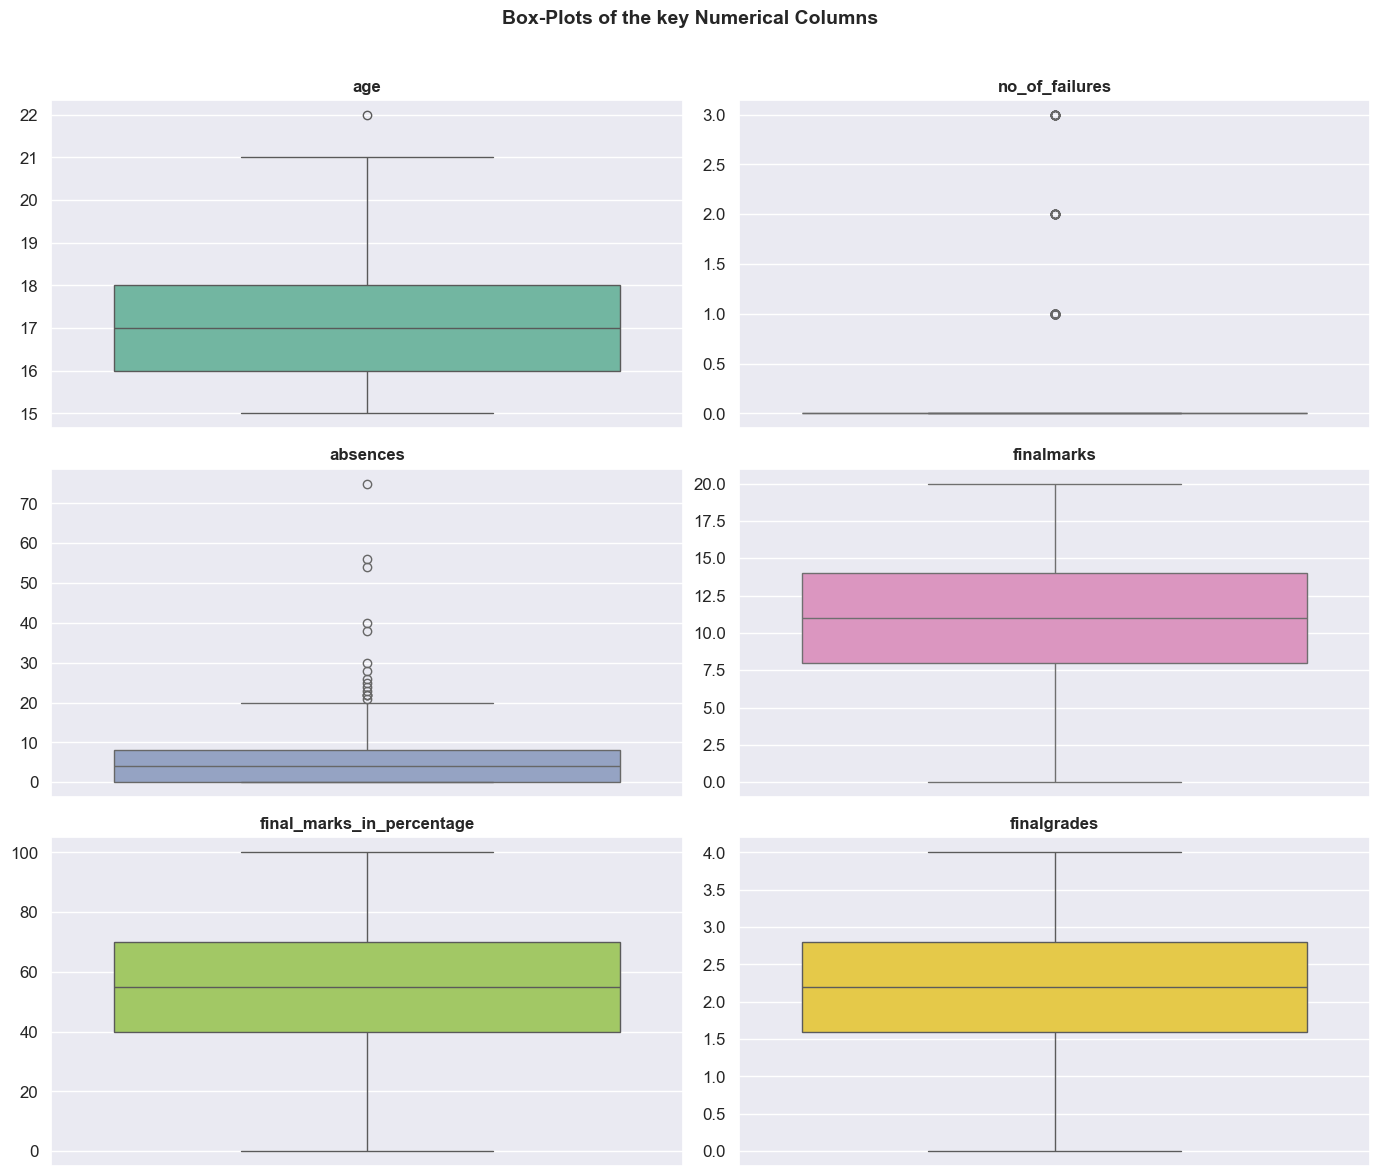

In [36]:
sns.set(style='darkgrid',palette='hls',font_scale=1.1)

fig,axes= plt.subplots(3,2,figsize=(14,12))
axes=axes.flatten()
colors=sns.color_palette("Set2", len(numerical_columns))


for i,col in enumerate(numerical_columns):
    sns.boxplot(y=df[col],ax=axes[i],color=colors[i])
    axes[i].set_title(f'{col}',fontsize=12,fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(len(numerical_columns),len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Box-Plots of the key Numerical Columns",fontsize=14,fontweight="bold")
plt.tight_layout(rect=[0,0,1,0.97])

plt.show()

In [37]:
df[numerical_columns]=df[numerical_columns].fillna(df[numerical_columns].median())

In [38]:
df[numerical_columns].isnull().sum()

age                          0
no_of_failures               0
absences                     0
finalmarks                   0
final_marks_in_percentage    0
finalgrades                  0
dtype: int64

## Working with the Categorical columns

In [40]:
categorical_columns=df.select_dtypes(include=['category','object']).columns

In [41]:
df[categorical_columns].head()

,sex,address,FamilySize,ParentStatus,MotherEducation,FatherEducation,MotherJob,FatherJob,reason,guardian,traveltime_in_min,studytime_in_hrs,SchoolSupport,FamilySupport,ExtraPaidClasses,activities,nursery,higher,internet,romantic,FamilyRelation,freetime,Hangout,DailyAlcoholConsumption,WeekendAlcoholConsumption,health
0,F,Urban,Greater_Than_3,Apart,higher_education,higher_education,at_home,teacher,course,mother,15_30,2-5,yes,no,no,no,yes,yes,no,no,very_good,medium,high,very_low,very_low,good
1,F,Urban,Greater_Than_3,Together,primary_education,primary_education,at_home,other,course,father,<15,2-5,no,yes,no,no,no,yes,yes,no,excellent,medium,medium,very_low,very_low,good
2,F,Urban,Less_Equal_3,Together,primary_education,primary_education,at_home,other,other,mother,<15,2-5,yes,no,yes,no,yes,yes,yes,no,very_good,medium,low,low,medium,good
3,F,NaN,Greater_Than_3,Together,higher_education,lower_secondary,health,services,home,mother,<15,5-10,no,yes,yes,yes,yes,yes,yes,yes,good,low,low,very_low,very_low,excellent
4,F,Urban,Greater_Than_3,Together,secondary_education,secondary_education,other,other,home,father,<15,2-5,no,yes,yes,no,yes,yes,no,no,very_good,medium,low,very_low,low,excellent


In [45]:
missing_info={}
for col in categorical_columns:
    if df[col].isnull().sum()>0:
        missing_count=(df[col].isnull().sum()/len(df))*100
        missing_info[col]=round(missing_count,2)
    print('The missing values of Numerical columns with percentage is: ')
    for col,perc in missing_info.items():
        print(f'{col} : {perc}%')

The missing values of Numerical columns with percentage is: 
The missing values of Numerical columns with percentage is: 
address : 0.51%
The missing values of Numerical columns with percentage is: 
address : 0.51%
The missing values of Numerical columns with percentage is: 
address : 0.51%
The missing values of Numerical columns with percentage is: 
address : 0.51%
The missing values of Numerical columns with percentage is: 
address : 0.51%
The missing values of Numerical columns with percentage is: 
address : 0.51%
The missing values of Numerical columns with percentage is: 
address : 0.51%
The missing values of Numerical columns with percentage is: 
address : 0.51%
The missing values of Numerical columns with percentage is: 
address : 0.51%
The missing values of Numerical columns with percentage is: 
address : 0.51%
The missing values of Numerical columns with percentage is: 
address : 0.51%
The missing values of Numerical columns with percentage is: 
address : 0.51%
The missing val

In [46]:
categorical_columns=df.select_dtypes(include=['category','object']).columns

In [53]:
df[categorical_columns]=df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [48]:
df[categorical_columns].isnull().sum()

sex                          0
address                      0
FamilySize                   0
ParentStatus                 0
MotherEducation              0
FatherEducation              0
MotherJob                    0
FatherJob                    0
reason                       0
guardian                     0
traveltime_in_min            0
studytime_in_hrs             0
SchoolSupport                0
FamilySupport                0
ExtraPaidClasses             0
activities                   0
nursery                      0
higher                       0
internet                     0
romantic                     0
FamilyRelation               0
freetime                     0
Hangout                      0
DailyAlcoholConsumption      0
WeekendAlcoholConsumption    0
health                       0
dtype: int64

In [54]:
df.head()

,sex,age,address,FamilySize,ParentStatus,MotherEducation,FatherEducation,MotherJob,FatherJob,reason,guardian,traveltime_in_min,studytime_in_hrs,no_of_failures,SchoolSupport,FamilySupport,ExtraPaidClasses,activities,nursery,higher,internet,romantic,FamilyRelation,freetime,Hangout,DailyAlcoholConsumption,WeekendAlcoholConsumption,health,absences,finalmarks,final_marks_in_percentage,finalgrades
0,F,18.0,Urban,Greater_Than_3,Apart,higher_education,higher_education,at_home,teacher,course,mother,15_30,2-5,0,yes,no,no,no,yes,yes,no,no,very_good,medium,high,very_low,very_low,good,6.0,6,30.0,1.2
1,F,17.0,Urban,Greater_Than_3,Together,primary_education,primary_education,at_home,other,course,father,<15,2-5,0,no,yes,no,no,no,yes,yes,no,excellent,medium,medium,very_low,very_low,good,4.0,6,30.0,1.2
2,F,15.0,Urban,Less_Equal_3,Together,primary_education,primary_education,at_home,other,other,mother,<15,2-5,3,yes,no,yes,no,yes,yes,yes,no,very_good,medium,low,low,medium,good,10.0,10,50.0,2.0
3,F,15.0,Urban,Greater_Than_3,Together,higher_education,lower_secondary,health,services,home,mother,<15,5-10,0,no,yes,yes,yes,yes,yes,yes,yes,good,low,low,very_low,very_low,excellent,2.0,15,75.0,3.0
4,F,16.0,Urban,Greater_Than_3,Together,secondary_education,secondary_education,other,other,home,father,<15,2-5,0,no,yes,yes,no,yes,yes,no,no,very_good,medium,low,very_low,low,excellent,4.0,10,50.0,2.0


In [55]:
df.isnull().sum()

sex                          0
age                          0
address                      0
FamilySize                   0
ParentStatus                 0
MotherEducation              0
FatherEducation              0
MotherJob                    0
FatherJob                    0
reason                       0
guardian                     0
traveltime_in_min            0
studytime_in_hrs             0
no_of_failures               0
SchoolSupport                0
FamilySupport                0
ExtraPaidClasses             0
activities                   0
nursery                      0
higher                       0
internet                     0
romantic                     0
FamilyRelation               0
freetime                     0
Hangout                      0
DailyAlcoholConsumption      0
WeekendAlcoholConsumption    0
health                       0
absences                     0
finalmarks                   0
final_marks_in_percentage    0
finalgrades                  0
dtype: i

## Outliers Detection for Numerical Columns

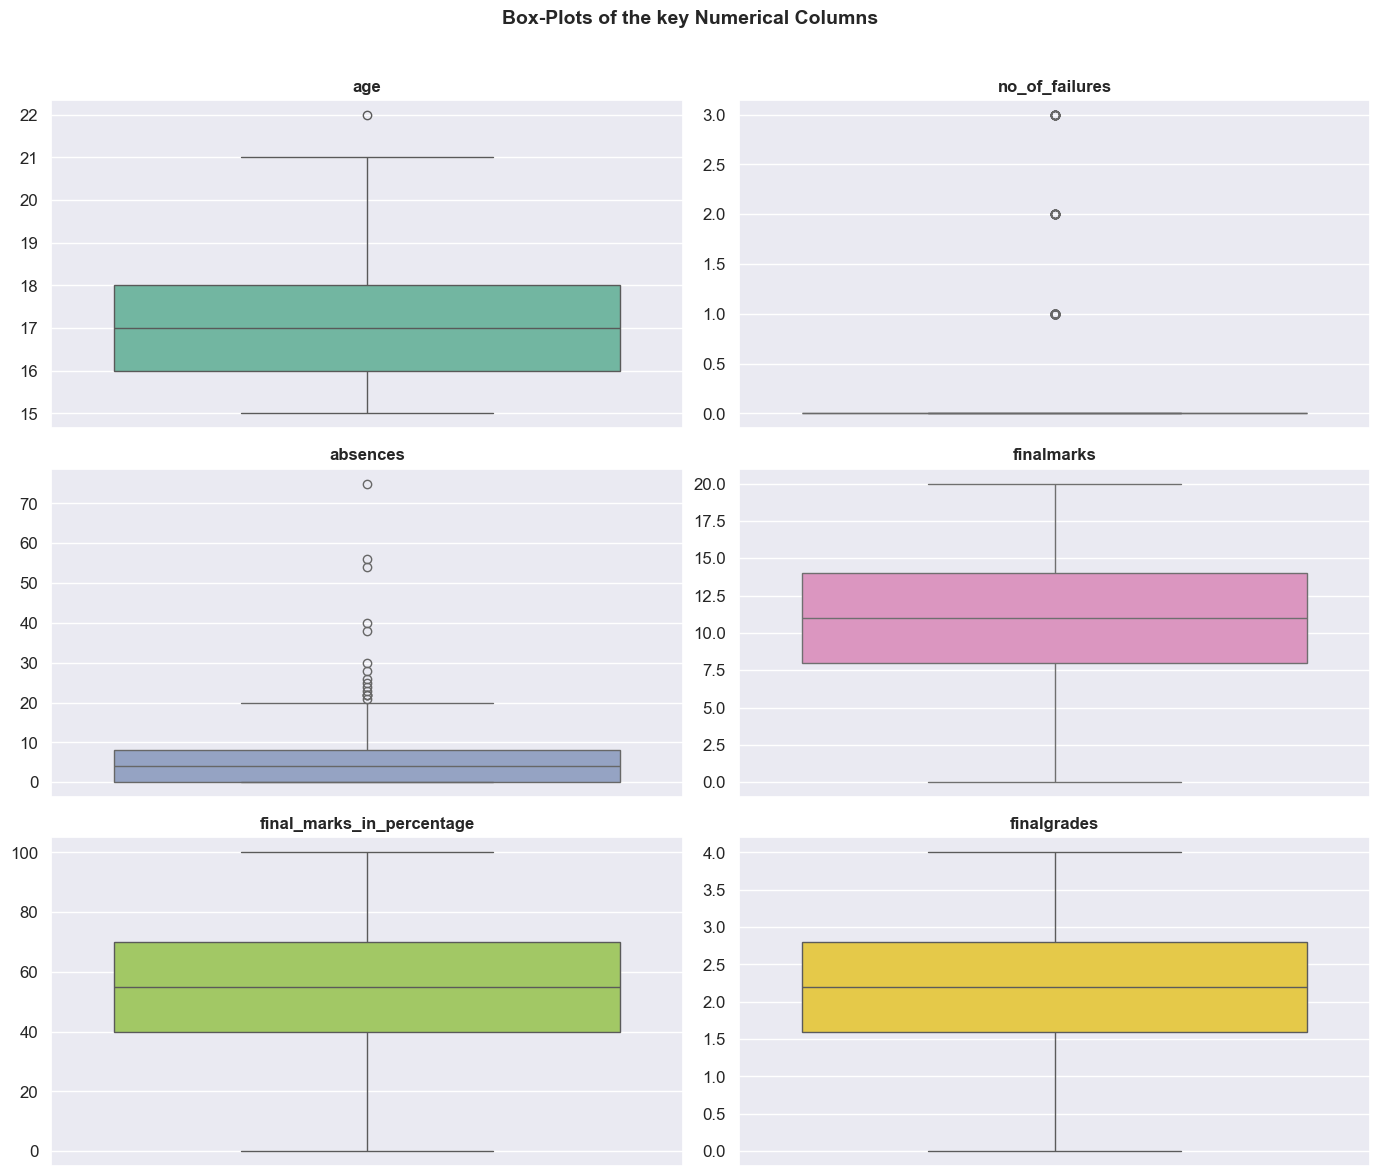

In [56]:
sns.set(style='darkgrid',palette='hls',font_scale=1.1)

fig,axes= plt.subplots(3,2,figsize=(14,12))
axes=axes.flatten()
colors=sns.color_palette("Set2", len(numerical_columns))


for i,col in enumerate(numerical_columns):
    sns.boxplot(y=df[col],ax=axes[i],color=colors[i])
    axes[i].set_title(f'{col}',fontsize=12,fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(len(numerical_columns),len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Box-Plots of the key Numerical Columns",fontsize=14,fontweight="bold")
plt.tight_layout(rect=[0,0,1,0.97])

plt.show()

## Prodecure to Remove outliers from the Numerical_Columns (if necessary)

In [66]:
array=np.array([10,11,9,8,12,13,100,18])
mean=array.mean()
std=array.std()
z=(array-mean)/std
print(z)
print(z.mean())


[-0.42963944 -0.3956086  -0.46367029 -0.49770114 -0.36157775 -0.3275469
  2.63313679 -0.15739267]
0.0


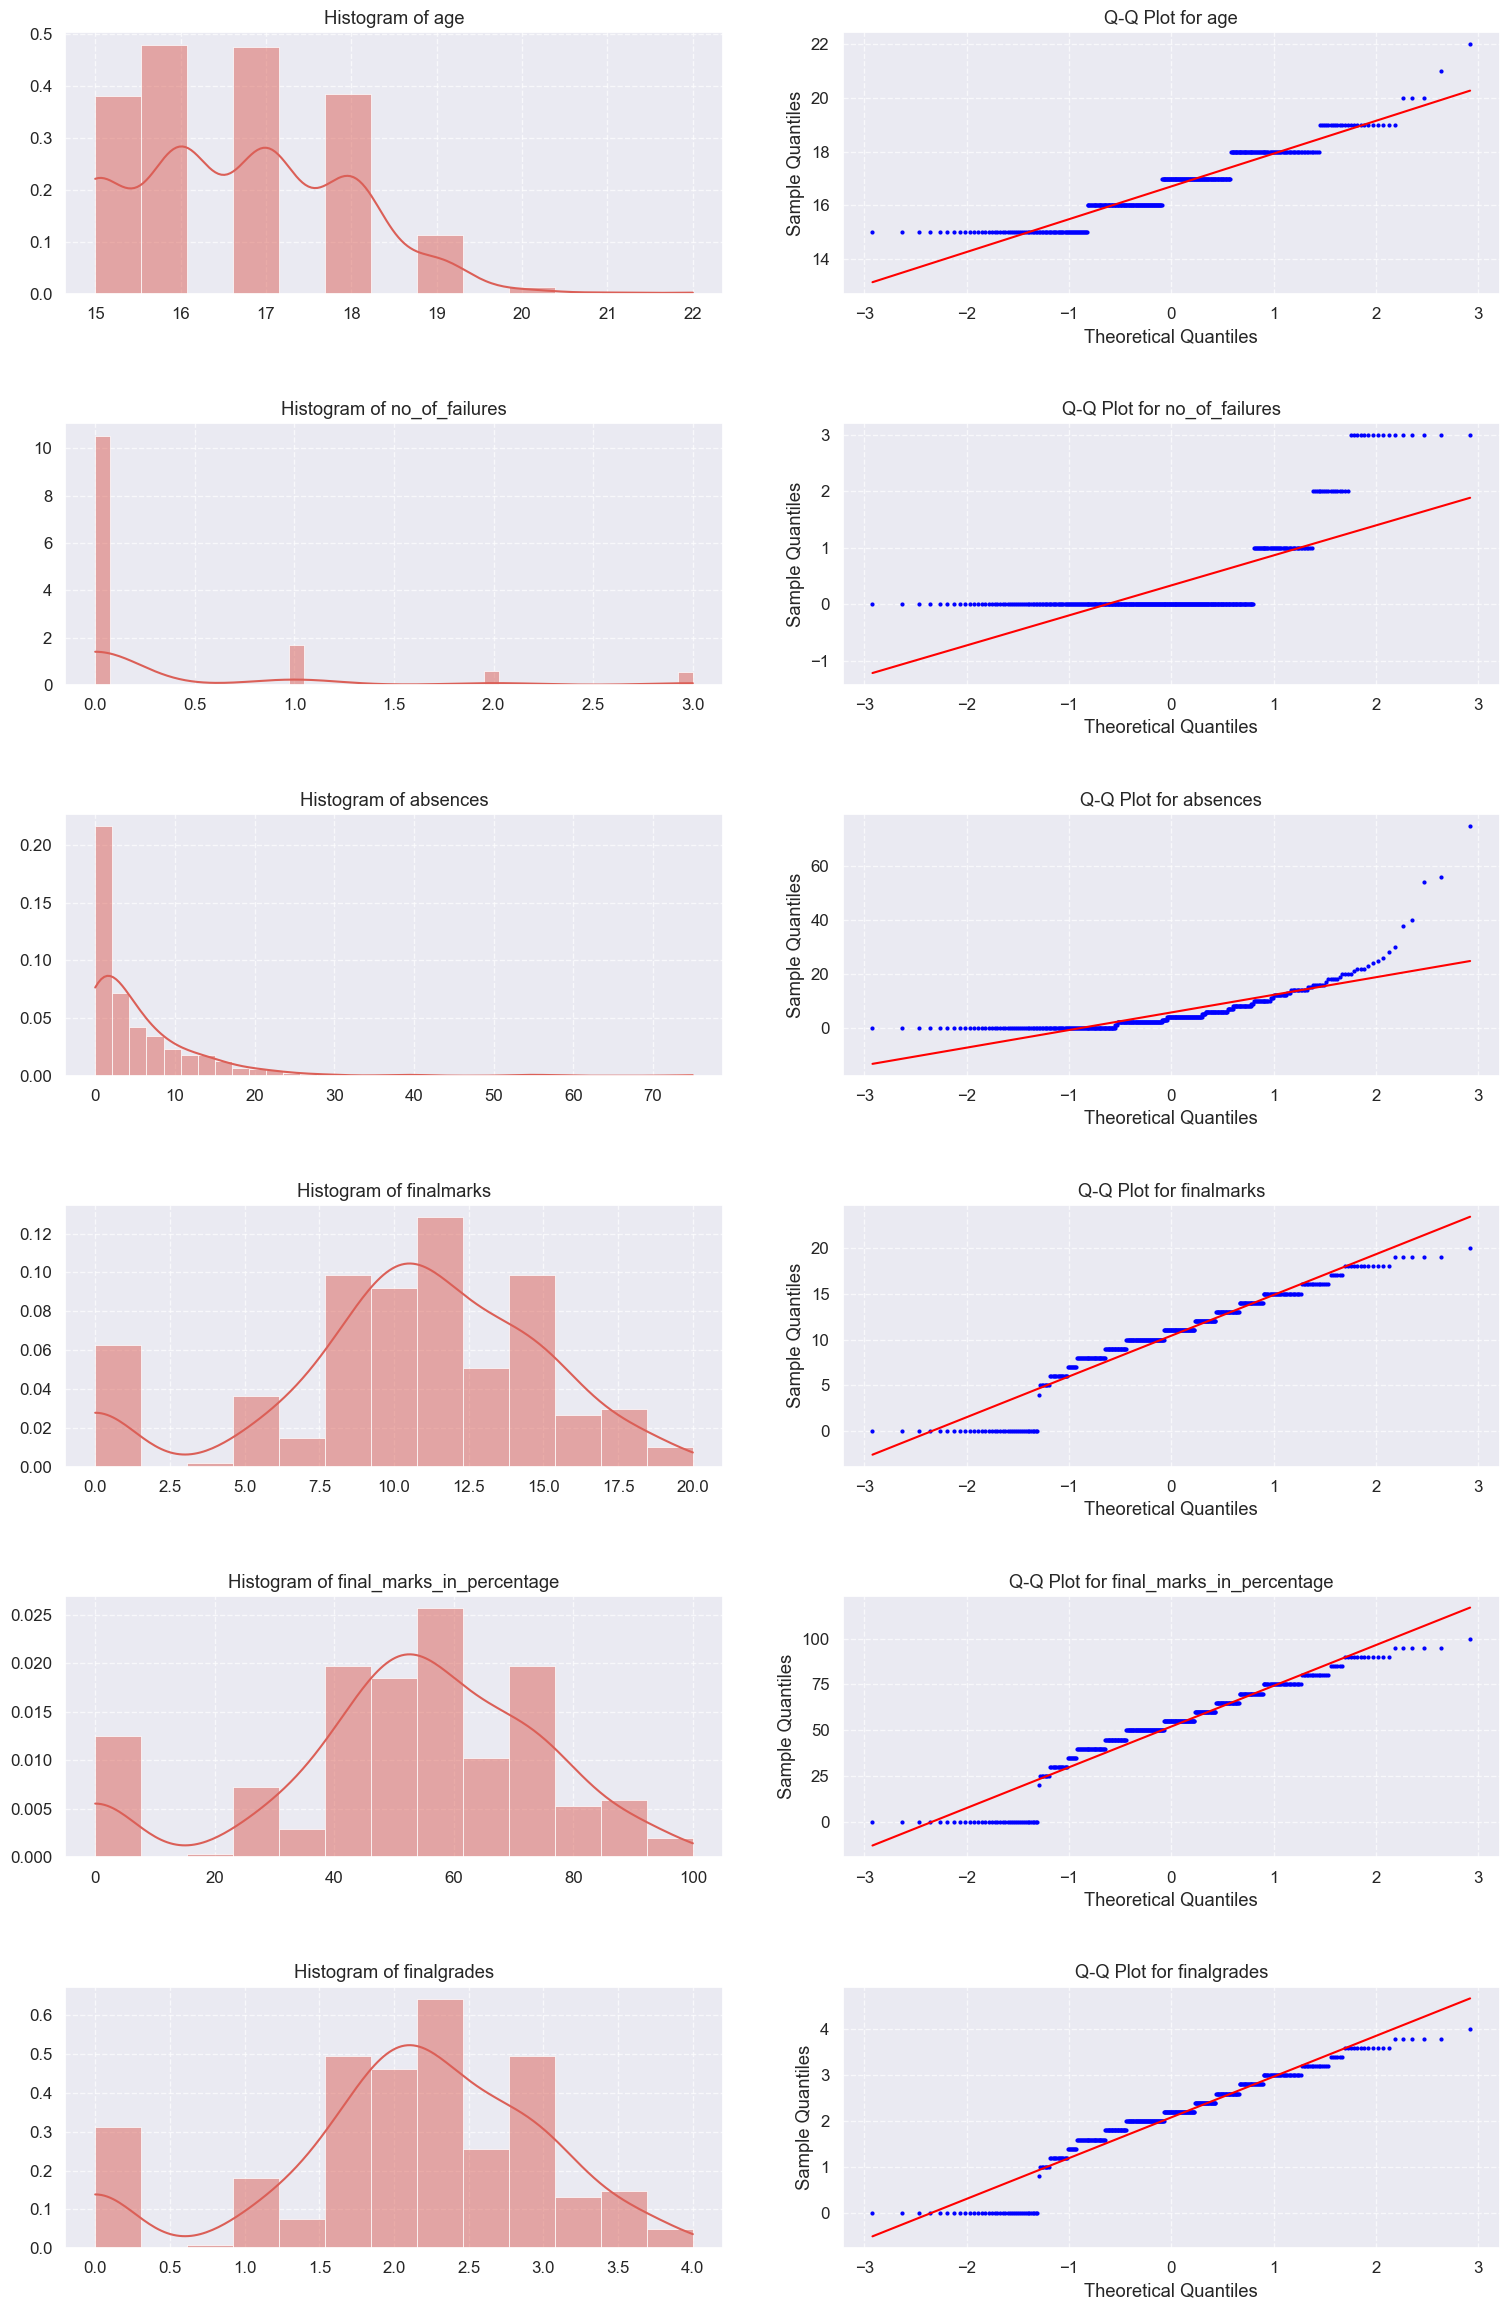

In [74]:
# Create a figure and axes for subplots
num_cols = len(numerical_columns)
fig, axes = plt.subplots(num_cols, 2, figsize=(16, num_cols * 4))

# Plotting histograms and Q-Q plots for each numerical columns
for i, col in enumerate(numerical_columns):
    # Histogram on the left subplot
    sns.histplot(df[col], kde=True, ax=axes[i, 0], stat='density', linewidth=0.5)
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('')
    axes[i, 0].grid(True, linestyle='--', alpha=0.7)


    # Q-Q plot on the right subplot
    stats.probplot(df[col], plot=axes[i, 1], dist='norm', fit=True)
    axes[i, 1].get_lines()[0].set_markersize(2.0) #Adjust marker size for clarity
    axes[i, 1].grid(True, linestyle='--', alpha=0.7)
    axes[i, 1].set_title(f'Q-Q Plot for {col}')
    axes[i, 1].set_xlabel('Theoretical Quantiles')
    axes[i, 1].set_ylabel('Sample Quantiles')

#Adjust layout and display plots
plt.tight_layout(pad=3.0)
plt.show()

## Assessing Normality Using Statistical Tests & Descriptive Statistics

## Z-Testing

In [6]:
import math

std=20 #standard deviation
actual_mean=400 
n=100 #sample
sample_mean=390 
aplha=0.05 #level of claim

Z = (sample_mean-actual_mean)/(std/math.sqrt(n))
print("Z-Test: ",Z)



Z-Test:  -5.0


## Prodecure to Remove outliers from the Numerical Columns (if Necessary)